<a href="https://colab.research.google.com/github/iam-fern/Generate_multiplication_2X/blob/main/GQtest_data(y_hat)_multi_delta_(4)_n30_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import os
import statistics as stats
import scipy.stats as ss
from scipy.stats import f_oneway
from scipy import stats
from google.colab import drive
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_multiplication_2X/multiplication_delta_4'

In [4]:
os.listdir(base_path)

['data_multi_delta_4_n20.csv',
 'data_multi_delta_4_n30.csv',
 'data_multi_delta_4_n60.csv',
 'data_multi_delta_4_n120.csv',
 'data_multi_delta_4_n250.csv']

In [5]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_multi_delta_4_n30.csv')
pd.read_csv(file_path)

,rep,index,x1,x2,e,Y,y_hat,e_hat
0,0.0,0.0,49.231337,57.546755,-1343.049253,-1226.271161,969.099605,-2195.370765
1,0.0,1.0,44.635421,98.309901,1116.992919,1269.938242,2911.270738,-1641.332497
2,0.0,2.0,72.942335,65.497649,-5458.064868,-5309.624883,-176.445443,-5133.179440
3,0.0,3.0,21.852261,32.047894,-1105.604740,-1041.704585,1628.356607,-2670.061192
4,0.0,4.0,80.441727,20.507905,-541.981194,-431.031563,-2470.336729,2039.305167
...,...,...,...,...,...,...,...,...
29995,999.0,25.0,70.968354,26.194768,-110.131701,-2.968579,-82.267825,79.299245
29996,999.0,26.0,75.449714,80.472893,994.473477,1160.396085,1280.535872,-120.139787
29997,999.0,27.0,87.208572,86.863456,5616.931710,5801.003738,1197.658925,4603.344813
29998,999.0,28.0,46.720435,81.500631,11674.139503,11812.360570,1930.611446,9881.749123


In [6]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,e,Y,y_hat,e_hat
0,0.0,0.0,49.231337,57.546755,-1343.049253,-1226.271161,969.099605,-2195.370765
1,0.0,1.0,44.635421,98.309901,1116.992919,1269.938242,2911.270738,-1641.332497
2,0.0,2.0,72.942335,65.497649,-5458.064868,-5309.624883,-176.445443,-5133.179440
3,0.0,3.0,21.852261,32.047894,-1105.604740,-1041.704585,1628.356607,-2670.061192
4,0.0,4.0,80.441727,20.507905,-541.981194,-431.031563,-2470.336729,2039.305167
...,...,...,...,...,...,...,...,...
29995,999.0,25.0,70.968354,26.194768,-110.131701,-2.968579,-82.267825,79.299245
29996,999.0,26.0,75.449714,80.472893,994.473477,1160.396085,1280.535872,-120.139787
29997,999.0,27.0,87.208572,86.863456,5616.931710,5801.003738,1197.658925,4603.344813
29998,999.0,28.0,46.720435,81.500631,11674.139503,11812.360570,1930.611446,9881.749123


In [7]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2             e             Y        y_hat  \
rep   index                                                                  
0.0   0.0    49.231337  57.546755  -1343.049253  -1226.271161   969.099605   
      1.0    44.635421  98.309901   1116.992919   1269.938242  2911.270738   
      2.0    72.942335  65.497649  -5458.064868  -5309.624883  -176.445443   
      3.0    21.852261  32.047894  -1105.604740  -1041.704585  1628.356607   
      4.0    80.441727  20.507905   -541.981194   -431.031563 -2470.336729   
...                ...        ...           ...           ...          ...   
999.0 25.0   70.968354  26.194768   -110.131701     -2.968579   -82.267825   
      26.0   75.449714  80.472893    994.473477   1160.396085  1280.535872   
      27.0   87.208572  86.863456   5616.931710   5801.003738  1197.658925   
      28.0   46.720435  81.500631  11674.139503  11812.360570  1930.611446   
      29.0   20.229406  94.099130   3203.258010   3327.586546  2843.407915   

                   e_hat  
rep   index               
0.0   0.0   -2195.370765  
      1.0   -1641.332497  
      2.0   -5133.179440  
      3.0   -2670.061192  
      4.0    2039.305167  
...                  ...  
999.0 25.0     79.299245  
      26.0   -120.139787  
      27.0   4603.344813  
      28.0   9881.749123  
      29.0    484.178632  

[30000 rows x 6 columns]

In [8]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2             e             Y        y_hat  \
rep   index                                                                  
0.0   0.0    49.231337  57.546755  -1343.049253  -1226.271161   969.099605   
      1.0    44.635421  98.309901   1116.992919   1269.938242  2911.270738   
      2.0    72.942335  65.497649  -5458.064868  -5309.624883  -176.445443   
      3.0    21.852261  32.047894  -1105.604740  -1041.704585  1628.356607   
      4.0    80.441727  20.507905   -541.981194   -431.031563 -2470.336729   
...                ...        ...           ...           ...          ...   
999.0 25.0   70.968354  26.194768   -110.131701     -2.968579   -82.267825   
      26.0   75.449714  80.472893    994.473477   1160.396085  1280.535872   
      27.0   87.208572  86.863456   5616.931710   5801.003738  1197.658925   
      28.0   46.720435  81.500631  11674.139503  11812.360570  1930.611446   
      29.0   20.229406  94.099130   3203.258010   3327.586546  2843.407915   

                   e_hat  
rep   index               
0.0   0.0   -2195.370765  
      1.0   -1641.332497  
      2.0   -5133.179440  
      3.0   -2670.061192  
      4.0    2039.305167  
...                  ...  
999.0 25.0     79.299245  
      26.0   -120.139787  
      27.0   4603.344813  
      28.0   9881.749123  
      29.0    484.178632  

[30000 rows x 6 columns]

In [9]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,e,Y,y_hat,e_hat
0,0.0,0.0,49.231337,57.546755,-1343.049253,-1226.271161,969.099605,-2195.370765
1,0.0,1.0,44.635421,98.309901,1116.992919,1269.938242,2911.270738,-1641.332497
2,0.0,2.0,72.942335,65.497649,-5458.064868,-5309.624883,-176.445443,-5133.179440
3,0.0,3.0,21.852261,32.047894,-1105.604740,-1041.704585,1628.356607,-2670.061192
4,0.0,4.0,80.441727,20.507905,-541.981194,-431.031563,-2470.336729,2039.305167
...,...,...,...,...,...,...,...,...
29995,999.0,25.0,70.968354,26.194768,-110.131701,-2.968579,-82.267825,79.299245
29996,999.0,26.0,75.449714,80.472893,994.473477,1160.396085,1280.535872,-120.139787
29997,999.0,27.0,87.208572,86.863456,5616.931710,5801.003738,1197.658925,4603.344813
29998,999.0,28.0,46.720435,81.500631,11674.139503,11812.360570,1930.611446,9881.749123


In [10]:
table.set_index(['rep', 'index'], inplace=True)

In [11]:
table

x1         x2             e             Y        y_hat  \
rep   index                                                                  
0.0   0.0    49.231337  57.546755  -1343.049253  -1226.271161   969.099605   
      1.0    44.635421  98.309901   1116.992919   1269.938242  2911.270738   
      2.0    72.942335  65.497649  -5458.064868  -5309.624883  -176.445443   
      3.0    21.852261  32.047894  -1105.604740  -1041.704585  1628.356607   
      4.0    80.441727  20.507905   -541.981194   -431.031563 -2470.336729   
...                ...        ...           ...           ...          ...   
999.0 25.0   70.968354  26.194768   -110.131701     -2.968579   -82.267825   
      26.0   75.449714  80.472893    994.473477   1160.396085  1280.535872   
      27.0   87.208572  86.863456   5616.931710   5801.003738  1197.658925   
      28.0   46.720435  81.500631  11674.139503  11812.360570  1930.611446   
      29.0   20.229406  94.099130   3203.258010   3327.586546  2843.407915   

                   e_hat  
rep   index               
0.0   0.0   -2195.370765  
      1.0   -1641.332497  
      2.0   -5133.179440  
      3.0   -2670.061192  
      4.0    2039.305167  
...                  ...  
999.0 25.0     79.299245  
      26.0   -120.139787  
      27.0   4603.344813  
      28.0   9881.749123  
      29.0    484.178632  

[30000 rows x 6 columns]

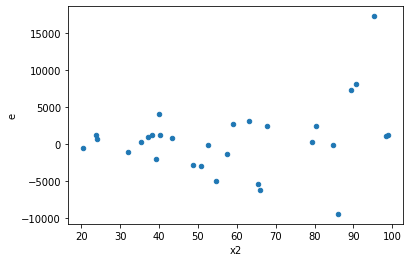

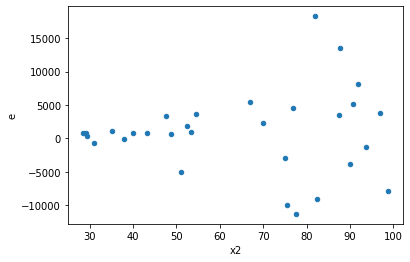

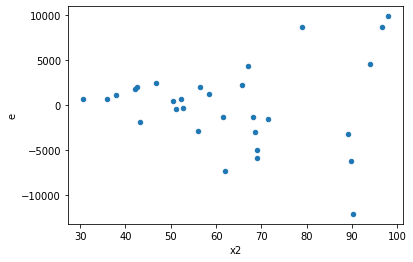

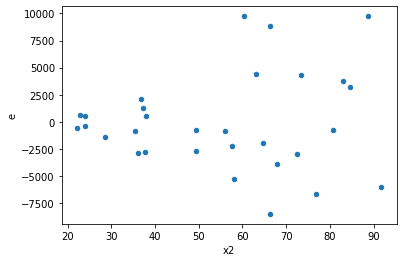

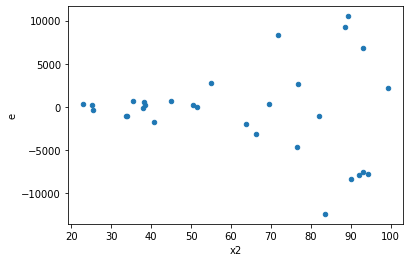

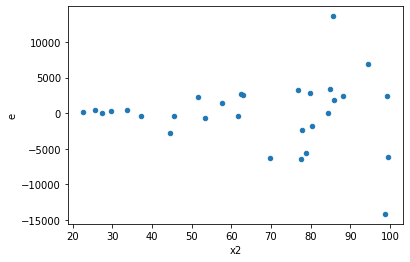

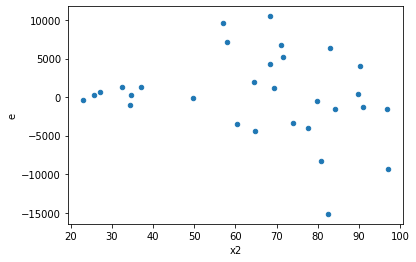

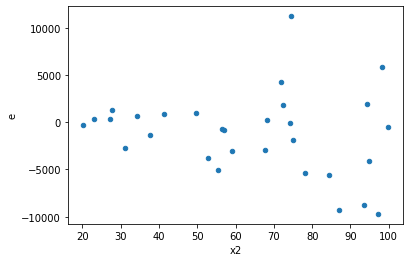

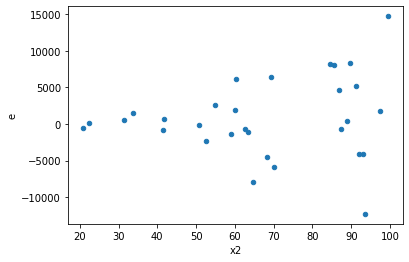

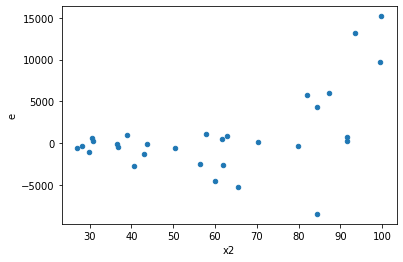

In [12]:
tablenew0 = table.loc[0.0]
tablenew1 = table.loc[1.0]
tablenew2 = table.loc[2.0]
tablenew3 = table.loc[3.0]
tablenew4 = table.loc[4.0]
tablenew5 = table.loc[5.0]
tablenew6 = table.loc[6.0]
tablenew7 = table.loc[7.0]
tablenew8 = table.loc[8.0]
tablenew9 = table.loc[9.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [13]:
def get_result(run_replicate, percent_data):
    new_table = table.loc[run_replicate]

    # เรียง data จากน้อยไปมากตาม x1
    new_table_sort = new_table.sort_values('y_hat')
    new_table_sort.reset_index(inplace=True)
    new_table_sort.drop(['index'], axis=1, inplace=True)


    # แบ่งข้อมูลกลุ่มที่ 1
    table1 = new_table_sort.iloc[:int(percent_data*new_table_sort.shape[0]) , :]
    y = table1['Y']
    x = table1[['x1', 'x2']]
    # add constant to predictor variable
    x = sm.add_constant(x)
    # fit linear regression model
    model1 = sm.OLS(y, x).fit()

    # หาค่า df กลุ่ม 1
    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1


    # แบ่งข้อมูลกลุ่มที่ 2
    table2 = new_table_sort.iloc[int((1-percent_data)*new_table_sort.shape[0]): , :]

    y = table2['Y']
    x = table2[['x1', 'x2']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()
    #print(model.summary())

    # หาค่า df กลุ่ม 2
    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # ค่าสถิติทดสอบ
    GQ_test = (SSE2/DF2) / (SSE1/DF1)


    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test, df2, df1)))
    p_greater = ss.f.cdf(GQ_test, df2, df1)
    p_less = 1.0-ss.f.cdf(GQ_test, df2, df1)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]

# กำหนด % การแบ่งข้อมูล
percent_data=0.4

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less=get_result(run_replicate, percent_data)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test.append(GQ_test)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
0.0,10.0,10.0,136336866.80289882,215077639.9639262,13633686.680289883,21507763.99639262,1.577545714578158,0.4838670018428197,0.7580664990785901,0.24193350092140986,Reject001=1 : Homoscedasticity
1.0,10.0,10.0,10266271.756184392,902753132.5552651,1026627.1756184392,90275313.25552651,87.93388232796853,4.3623088030741997e-08,0.999999978188456,2.1811544015370998e-08,Reject001=0 : Heteroscedasticity
2.0,10.0,10.0,137931441.8418514,290398815.4826088,13793144.184185142,29039881.54826088,2.105385194302344,0.2561183281160275,0.8719408359419862,0.12805916405801376,Reject001=1 : Homoscedasticity
3.0,10.0,10.0,148730143.9379029,290125477.1581703,14873014.39379029,29012547.715817027,1.9506837650833047,0.30709540608453145,0.8464522969577343,0.15354770304226573,Reject001=1 : Homoscedasticity
4.0,10.0,10.0,208767064.36567342,349412609.2947555,20876706.436567344,34941260.92947555,1.6736960418369888,0.42949547979461533,0.7852522601026923,0.21474773989730767,Reject001=1 : Homoscedasticity
5.0,10.0,10.0,207473510.98899007,278745878.9045456,20747351.098899007,27874587.89045456,1.3435251448525287,0.6494010605647194,0.6752994697176403,0.3247005302823597,Reject001=1 : Homoscedasticity
8.0,10.0,10.0,49777001.85334458,561153811.0982641,4977700.185334458,56115381.10982641,11.273354967250995,0.0006836550309692324,0.9996581724845154,0.0003418275154846162,Reject001=0 : Heteroscedasticity
9.0,10.0,10.0,21323998.031429943,265323874.3870398,2132399.803142994,26532387.43870398,12.442501354388268,0.0004447883713432077,0.9997776058143284,0.00022239418567160385,Reject001=0 : Heteroscedasticity
10.0,10.0,10.0,54499977.499394044,457968157.7529203,5449997.749939404,45796815.77529203,8.40308893261492,0.00236892909859332,0.9988155354507033,0.00118446454929666,Reject001=0 : Heteroscedasticity


In [15]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                                  if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

#result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,10.0,10.0,136336866.80289882,215077639.9639262,13633686.680289883,21507763.99639262,1.577545714578158,0.4838670018428197,Reject001=1 : Homoscedasticity
1.0,10.0,10.0,10266271.756184392,902753132.5552651,1026627.1756184392,90275313.25552651,87.93388232796853,4.3623088030741997e-08,Reject001=0 : Heteroscedasticity
2.0,10.0,10.0,137931441.8418514,290398815.4826088,13793144.184185142,29039881.54826088,2.105385194302344,0.2561183281160275,Reject001=1 : Homoscedasticity
3.0,10.0,10.0,148730143.9379029,290125477.1581703,14873014.39379029,29012547.715817027,1.9506837650833047,0.30709540608453145,Reject001=1 : Homoscedasticity
4.0,10.0,10.0,208767064.36567342,349412609.2947555,20876706.436567344,34941260.92947555,1.6736960418369888,0.42949547979461533,Reject001=1 : Homoscedasticity
5.0,10.0,10.0,207473510.98899007,278745878.9045456,20747351.098899007,27874587.89045456,1.3435251448525287,0.6494010605647194,Reject001=1 : Homoscedasticity
6.0,10.0,10.0,359084919.4620778,118179897.70274362,35908491.94620778,11817989.770274362,0.32911406549676714,0.09419378366599848,Reject001=1 : Homoscedasticity
7.0,10.0,10.0,414696562.76765776,42580941.765601516,41469656.27676578,4258094.176560151,0.10267975572649816,0.0012787626731390117,Reject001=0 : Heteroscedasticity
8.0,10.0,10.0,49777001.85334458,561153811.0982641,4977700.185334458,56115381.10982641,11.273354967250995,0.0006836550309692324,Reject001=0 : Heteroscedasticity


In [16]:
result_show['Result_test'].value_counts()

Reject001=0 : Heteroscedasticity    543
Reject001=1 : Homoscedasticity      457
Name: Result_test, dtype: int64